Import packages required

In [1]:
import requests
import json
import requests
import pandas as pd
import urllib.request
import shutil
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json

Get meta data of all the images available in the ISIC website that we can use to train and test our model

In [6]:
#API url
url = "https://api.isic-archive.com/api/v2/images/search/"
metadata_list = []

while True:
    response = requests.get(url, verify=False)
    response_data = response.json()
    # Retrieve metadata from current page and add it to list
    metadata_list.extend(response_data["results"])
    # Check if there are more pages
    if response_data["next"] != None:
        url = response_data["next"]
    else:
        break

# Create dataframe from metadata list
metadata_df = pd.DataFrame(metadata_list)

# Print dataframe
metadata_df





C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\philip.

C:\Users\philip.carmine\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.isic-archive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


,isic_id,public,copyright_license,attribution,metadata,files
0,ISIC_6230191,True,CC-BY-NC,Hospital Italiano de Buenos Aires,"{'acquisition': {'pixels_x': 640, 'pixels_y': ...",{'full': {'url': 'https://content.isic-archive...
1,ISIC_4485929,True,CC-BY-NC,Hospital Italiano de Buenos Aires,"{'acquisition': {'pixels_x': 2448, 'pixels_y':...",{'full': {'url': 'https://content.isic-archive...
2,ISIC_3079785,True,CC-BY-NC,Hospital Italiano de Buenos Aires,"{'acquisition': {'pixels_x': 640, 'pixels_y': ...",{'full': {'url': 'https://content.isic-archive...
3,ISIC_9677008,True,CC-BY-NC,Hospital Italiano de Buenos Aires,"{'acquisition': {'pixels_x': 1409, 'pixels_y':...",{'full': {'url': 'https://content.isic-archive...
4,ISIC_9129115,True,CC-BY-NC,Hospital Italiano de Buenos Aires,"{'acquisition': {'pixels_x': 498, 'pixels_y': ...",{'full': {'url': 'https://content.isic-archive...
...,...,...,...,...,...,...
75005,ISIC_0000004,True,CC-0,Anonymous,"{'acquisition': {'pixels_x': 1022, 'pixels_y':...",{'full': {'url': 'https://content.isic-archive...
75006,ISIC_0000003,True,CC-0,Anonymous,"{'acquisition': {'pixels_x': 1022, 'pixels_y':...",{'full': {'url': 'https://content.isic-archive...
75007,ISIC_0000002,True,CC-0,Anonymous,"{'acquisition': {'pixels_x': 1022, 'pixels_y':...",{'full': {'url': 'https://content.isic-archive...
75008,ISIC_0000001,True,CC-0,Anonymous,"{'acquisition': {'pixels_x': 1022, 'pixels_y':...",{'full': {'url': 'https://content.isic-archive...


Extract the diagnosis information into it's own column

In [7]:
l = list()
for i in range(0, metadata_df.shape[0]):
    if metadata_df.iloc[i]['metadata']['clinical'].get('diagnosis') is None:
        l.append('NA')
    else:
        l.append(metadata_df.iloc[i]['metadata']['clinical']['diagnosis'])

metadata_df['Diagnosis'] = l

#metadata_df.to_csv('data.csv')

Extract the image URL into it's own column

In [8]:
l = list()
for i in range(0, metadata_df.shape[0]):
    if metadata_df.iloc[i]['files']['thumbnail_256'].get('url') is None:
        l.append('NA')
    else:
        l.append(metadata_df.iloc[i]['files']['thumbnail_256']['url'])

metadata_df['URL'] = l

#metadata_df.to_csv('data.csv')

Get the top 1000 melanoma images from the API and store in a directory called 'melanoma'

In [9]:


if not os.path.exists("melanoma"):
    os.mkdir("melanoma")


metadata_df_mel_top = metadata_df[metadata_df['Diagnosis'] == 'melanoma']
metadata_df_mel_top = metadata_df_mel_top.head(1000)

for i in range(0, metadata_df_mel_top.shape[0]):
    if metadata_df_mel_top.iloc[i]['URL'] != 'NA':
        urllib.request.urlretrieve(metadata_df_mel_top.iloc[i]['URL'], metadata_df_mel_top.iloc[i]['isic_id'] + ".jpg")
        shutil.move(metadata_df_mel_top.iloc[i]['isic_id'] + ".jpg", "melanoma")
        



#urllib.request.urlretrieve(metadata_df.iloc[10003]['files']['full']['url'], "image.jpg")

Get a random sample of 1000 non-melanoma images from the API and store in a directory called 'not melanoma'

In [10]:


if not os.path.exists("not melanoma"):
    os.mkdir("not melanoma")


metadata_df_notmel_top = metadata_df[metadata_df['Diagnosis'] != 'melanoma']
metadata_df_notmel_top = metadata_df_notmel_top[metadata_df_notmel_top['Diagnosis'] != 'NA']
num_list = random.sample(range(0, metadata_df_notmel_top.shape[0]), 1000)

for i in num_list:
    if metadata_df_notmel_top.iloc[i]['URL'] != 'NA':
        urllib.request.urlretrieve(metadata_df_notmel_top.iloc[i]['URL'], metadata_df_notmel_top.iloc[i]['isic_id'] + ".jpg")
        shutil.move(metadata_df_notmel_top.iloc[i]['isic_id'] + ".jpg", "not melanoma")
        

Re-organise the melanoma and non-melanoma images saved above into training and testing datasets

In [11]:
#split datasets into train and test

#create directorires for each of the dataset with separate folders for images that are melanoma and not melanoma
if not os.path.exists("train"):
    os.mkdir("train")
    
if not os.path.exists("test"):
    os.mkdir("test")

if not os.path.exists("train/melanoma"):
    os.mkdir("train/melanoma")
    
if not os.path.exists("test/melanoma"):
    os.mkdir("test/melanoma")
    
if not os.path.exists("train/not melanoma"):
    os.mkdir("train/not melanoma")    
    
if not os.path.exists("test/not melanoma"):
    os.mkdir("test/not melanoma")    

    
mel_list = list()

    
for p in os.listdir('melanoma'):
    mel_list.append(p)  
    
random.shuffle(mel_list)
train_data_mel, test_data_mel = train_test_split(mel_list,test_size=0.2) 

nmel_list = list()

for p in os.listdir('not melanoma'):
    nmel_list.append(p) 
    
random.shuffle(nmel_list)
train_data_nmel, test_data_nmel = train_test_split(nmel_list,test_size=0.2) 

for i in train_data_mel:
    shutil.move("melanoma/"+i, "train/melanoma")
    
for i in test_data_mel:
    shutil.move("melanoma/"+i, "test/melanoma")
    
for i in train_data_nmel:
    shutil.move("not melanoma/"+i, "train/not melanoma")
    
for i in test_data_nmel:
    shutil.move("not melanoma/"+i, "test/not melanoma")

Create a function that can be used to create either the training or testing datasets by passing a file path, collecting each image under the file path, designating it as melanoma or not melanom, and converting each image to an RGB based numpy array that the neural network code can process

In [17]:
labels = ['melanoma', 'not melanoma']
img_size = 220

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Delete data from the following variables to free up memory

In [18]:
del metadata_df
del metadata_df_notmel_top
del metadata_df_mel_top
del mel_list
del nmel_list
del train_data_nmel
del test_data_nmel
del train_data_mel
del test_data_mel

NameError: name 'metadata_df' is not defined

In [19]:
del x_train
del y_train
del x_test
del y_test

Use the function defined above to create the training and testing datasets. Divide this into features and labels for each of the training and testing datasets. Following this, the data needs to be normalized

In [20]:


x_train = []
y_train = []
x_test = []
y_test = []

train_data = get_data('train')

for feature, label in train_data:
    x_train.append(feature)
    y_train.append(label)
del train_data

test_data = get_data('test')

for feature, label in test_data:
    x_test.append(feature)
    y_test.append(label)
del test_data
    
# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
#Data augmentation on the train data:-

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

<ipython-input-17-8b5e68c0cabe>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


Create sequential convulutional neural network model with three hidden layers

In [21]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_size,img_size,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 64)      

Train the CNN model defined above and observe the accuracy on the test and train datasets

In [22]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_test, y_test))

Epoch 1/500
50/50 [==============================] - 55s 1s/step - loss: 0.6936 - accuracy: 0.5150 - val_loss: 0.6936 - val_accuracy: 0.4800
Epoch 2/500
50/50 [==============================] - 60s 1s/step - loss: 0.6963 - accuracy: 0.4975 - val_loss: 0.6923 - val_accuracy: 0.4875
Epoch 3/500
50/50 [==============================] - 57s 1s/step - loss: 0.6928 - accuracy: 0.5163 - val_loss: 0.6903 - val_accuracy: 0.4900
Epoch 4/500
50/50 [==============================] - 56s 1s/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6887 - val_accuracy: 0.5450
Epoch 5/500
50/50 [==============================] - 55s 1s/step - loss: 0.6923 - accuracy: 0.5219 - val_loss: 0.6876 - val_accuracy: 0.5400
Epoch 6/500
50/50 [==============================] - 60s 1s/step - loss: 0.6900 - accuracy: 0.5300 - val_loss: 0.6865 - val_accuracy: 0.5475
Epoch 7/500
50/50 [==============================] - 64s 1s/step - loss: 0.6891 - accuracy: 0.5400 - val_loss: 0.6852 - val_accuracy: 0.6125
Epoch 8/500
5

Epoch 59/500
50/50 [==============================] - 81s 2s/step - loss: 0.5989 - accuracy: 0.7019 - val_loss: 0.5863 - val_accuracy: 0.7425
Epoch 60/500
50/50 [==============================] - 76s 2s/step - loss: 0.5970 - accuracy: 0.6988 - val_loss: 0.5849 - val_accuracy: 0.7400
Epoch 61/500
50/50 [==============================] - 74s 1s/step - loss: 0.5956 - accuracy: 0.7025 - val_loss: 0.5834 - val_accuracy: 0.7325
Epoch 62/500
50/50 [==============================] - 69s 1s/step - loss: 0.5879 - accuracy: 0.7025 - val_loss: 0.5829 - val_accuracy: 0.7225
Epoch 63/500
50/50 [==============================] - 62s 1s/step - loss: 0.5920 - accuracy: 0.6975 - val_loss: 0.5802 - val_accuracy: 0.7325
Epoch 64/500
50/50 [==============================] - 54s 1s/step - loss: 0.5873 - accuracy: 0.7169 - val_loss: 0.5790 - val_accuracy: 0.7325
Epoch 65/500
50/50 [==============================] - 57s 1s/step - loss: 0.5895 - accuracy: 0.7013 - val_loss: 0.5785 - val_accuracy: 0.7250
Epoch 

50/50 [==============================] - 86s 2s/step - loss: 0.5279 - accuracy: 0.7519 - val_loss: 0.5251 - val_accuracy: 0.7650
Epoch 117/500
50/50 [==============================] - 82s 2s/step - loss: 0.5320 - accuracy: 0.7406 - val_loss: 0.5243 - val_accuracy: 0.7650
Epoch 118/500
50/50 [==============================] - 80s 2s/step - loss: 0.5269 - accuracy: 0.7563 - val_loss: 0.5247 - val_accuracy: 0.7750
Epoch 119/500
50/50 [==============================] - 81s 2s/step - loss: 0.5209 - accuracy: 0.7581 - val_loss: 0.5230 - val_accuracy: 0.7725
Epoch 120/500
50/50 [==============================] - 87s 2s/step - loss: 0.5247 - accuracy: 0.7487 - val_loss: 0.5244 - val_accuracy: 0.7575
Epoch 121/500
50/50 [==============================] - 82s 2s/step - loss: 0.5263 - accuracy: 0.7513 - val_loss: 0.5215 - val_accuracy: 0.7725
Epoch 122/500
50/50 [==============================] - 84s 2s/step - loss: 0.5176 - accuracy: 0.7575 - val_loss: 0.5213 - val_accuracy: 0.7650
Epoch 123/500

50/50 [==============================] - 54s 1s/step - loss: 0.4928 - accuracy: 0.7644 - val_loss: 0.4959 - val_accuracy: 0.7825
Epoch 174/500
50/50 [==============================] - 55s 1s/step - loss: 0.4871 - accuracy: 0.7819 - val_loss: 0.4955 - val_accuracy: 0.7775
Epoch 175/500
50/50 [==============================] - 54s 1s/step - loss: 0.4852 - accuracy: 0.7731 - val_loss: 0.4953 - val_accuracy: 0.7800
Epoch 176/500
50/50 [==============================] - 53s 1s/step - loss: 0.4878 - accuracy: 0.7663 - val_loss: 0.4948 - val_accuracy: 0.7800
Epoch 177/500
50/50 [==============================] - 53s 1s/step - loss: 0.4878 - accuracy: 0.7694 - val_loss: 0.4950 - val_accuracy: 0.7825
Epoch 178/500
50/50 [==============================] - 55s 1s/step - loss: 0.4849 - accuracy: 0.7681 - val_loss: 0.4966 - val_accuracy: 0.7875
Epoch 179/500
50/50 [==============================] - 56s 1s/step - loss: 0.4901 - accuracy: 0.7663 - val_loss: 0.4942 - val_accuracy: 0.7775
Epoch 180/500

50/50 [==============================] - 53s 1s/step - loss: 0.4654 - accuracy: 0.7844 - val_loss: 0.4795 - val_accuracy: 0.7875
Epoch 231/500
50/50 [==============================] - 55s 1s/step - loss: 0.4642 - accuracy: 0.7912 - val_loss: 0.4797 - val_accuracy: 0.7875
Epoch 232/500
50/50 [==============================] - 54s 1s/step - loss: 0.4630 - accuracy: 0.7881 - val_loss: 0.4793 - val_accuracy: 0.7725
Epoch 233/500
50/50 [==============================] - 54s 1s/step - loss: 0.4648 - accuracy: 0.7850 - val_loss: 0.4800 - val_accuracy: 0.7975
Epoch 234/500
50/50 [==============================] - 53s 1s/step - loss: 0.4675 - accuracy: 0.7812 - val_loss: 0.4789 - val_accuracy: 0.7900
Epoch 235/500
50/50 [==============================] - 53s 1s/step - loss: 0.4613 - accuracy: 0.7844 - val_loss: 0.4781 - val_accuracy: 0.7775
Epoch 236/500
50/50 [==============================] - 54s 1s/step - loss: 0.4633 - accuracy: 0.7775 - val_loss: 0.4781 - val_accuracy: 0.7750
Epoch 237/500

50/50 [==============================] - 64s 1s/step - loss: 0.4460 - accuracy: 0.7919 - val_loss: 0.4697 - val_accuracy: 0.7925
Epoch 288/500
50/50 [==============================] - 58s 1s/step - loss: 0.4497 - accuracy: 0.7825 - val_loss: 0.4731 - val_accuracy: 0.7925
Epoch 289/500
50/50 [==============================] - 66s 1s/step - loss: 0.4429 - accuracy: 0.7994 - val_loss: 0.4693 - val_accuracy: 0.7850
Epoch 290/500
50/50 [==============================] - 55s 1s/step - loss: 0.4484 - accuracy: 0.7981 - val_loss: 0.4692 - val_accuracy: 0.7900
Epoch 291/500
50/50 [==============================] - 54s 1s/step - loss: 0.4489 - accuracy: 0.7912 - val_loss: 0.4684 - val_accuracy: 0.7850
Epoch 292/500
50/50 [==============================] - 55s 1s/step - loss: 0.4425 - accuracy: 0.7912 - val_loss: 0.4688 - val_accuracy: 0.7875
Epoch 293/500
50/50 [==============================] - 58s 1s/step - loss: 0.4464 - accuracy: 0.7906 - val_loss: 0.4687 - val_accuracy: 0.7825
Epoch 294/500

50/50 [==============================] - 54s 1s/step - loss: 0.4300 - accuracy: 0.8037 - val_loss: 0.4621 - val_accuracy: 0.7875
Epoch 345/500
50/50 [==============================] - 56s 1s/step - loss: 0.4323 - accuracy: 0.8019 - val_loss: 0.4625 - val_accuracy: 0.7825
Epoch 346/500
50/50 [==============================] - 52s 1s/step - loss: 0.4324 - accuracy: 0.8000 - val_loss: 0.4624 - val_accuracy: 0.7925
Epoch 347/500
50/50 [==============================] - 54s 1s/step - loss: 0.4318 - accuracy: 0.7962 - val_loss: 0.4604 - val_accuracy: 0.7900
Epoch 348/500
50/50 [==============================] - 56s 1s/step - loss: 0.4350 - accuracy: 0.7919 - val_loss: 0.4609 - val_accuracy: 0.7925
Epoch 349/500
50/50 [==============================] - 51s 1s/step - loss: 0.4319 - accuracy: 0.7962 - val_loss: 0.4621 - val_accuracy: 0.7925
Epoch 350/500
50/50 [==============================] - 53s 1s/step - loss: 0.4332 - accuracy: 0.7944 - val_loss: 0.4608 - val_accuracy: 0.7900
Epoch 351/500

50/50 [==============================] - 59s 1s/step - loss: 0.4220 - accuracy: 0.8044 - val_loss: 0.4570 - val_accuracy: 0.7850
Epoch 402/500
50/50 [==============================] - 59s 1s/step - loss: 0.4181 - accuracy: 0.8000 - val_loss: 0.4569 - val_accuracy: 0.7850
Epoch 403/500
50/50 [==============================] - 59s 1s/step - loss: 0.4222 - accuracy: 0.8012 - val_loss: 0.4567 - val_accuracy: 0.7850
Epoch 404/500
50/50 [==============================] - 58s 1s/step - loss: 0.4183 - accuracy: 0.8131 - val_loss: 0.4564 - val_accuracy: 0.7900
Epoch 405/500
50/50 [==============================] - 59s 1s/step - loss: 0.4186 - accuracy: 0.8081 - val_loss: 0.4574 - val_accuracy: 0.7875
Epoch 406/500
50/50 [==============================] - 71s 1s/step - loss: 0.4159 - accuracy: 0.8119 - val_loss: 0.4570 - val_accuracy: 0.7850
Epoch 407/500
50/50 [==============================] - 66s 1s/step - loss: 0.4140 - accuracy: 0.8025 - val_loss: 0.4562 - val_accuracy: 0.7825
Epoch 408/500

50/50 [==============================] - 56s 1s/step - loss: 0.4083 - accuracy: 0.8156 - val_loss: 0.4522 - val_accuracy: 0.7850
Epoch 459/500
50/50 [==============================] - 56s 1s/step - loss: 0.4087 - accuracy: 0.8112 - val_loss: 0.4550 - val_accuracy: 0.7925
Epoch 460/500
50/50 [==============================] - 56s 1s/step - loss: 0.4125 - accuracy: 0.8056 - val_loss: 0.4543 - val_accuracy: 0.7875
Epoch 461/500
50/50 [==============================] - 53s 1s/step - loss: 0.4063 - accuracy: 0.8087 - val_loss: 0.4534 - val_accuracy: 0.7850
Epoch 462/500
50/50 [==============================] - 53s 1s/step - loss: 0.4096 - accuracy: 0.8087 - val_loss: 0.4520 - val_accuracy: 0.7850
Epoch 463/500
50/50 [==============================] - 53s 1s/step - loss: 0.4033 - accuracy: 0.8056 - val_loss: 0.4534 - val_accuracy: 0.7850
Epoch 464/500
50/50 [==============================] - 54s 1s/step - loss: 0.4078 - accuracy: 0.8031 - val_loss: 0.4527 - val_accuracy: 0.7825
Epoch 465/500

Write model to JSON file so that it can be loaded from disk within the MelaMate application

In [23]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Write model weights to H5 file so that it can be loaded from disk within the MelaMate application

In [24]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Test loading the file from disk

In [25]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


Test compiling model loaded from disk

In [26]:
opt = Adam(learning_rate=0.000001)
loaded_model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
score = loaded_model.evaluate(x_train, y_train, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 81.75%


Get predictions of model on each testing data point, both predicted class probability and predicted classes

In [27]:
predict_prob=loaded_model.predict(x_test)

predict_classes=np.argmax(predict_prob,axis=1)

13/13 [==============================] - 3s 212ms/step


Compare the predicted and actual classes for each data point

In [28]:
results = list()
for i in range(0, len(x_test)):
    if predict_prob[i][1] < 0.5:
        p = 0
    else:
        p = 1
    if p == y_test[i]:
        o = True
    else:
        o = False
    x = [y_test[i], predict_prob[i][1], p, o]
    results.append(x)

Get the list of predictions that were incorrect

In [29]:
errors = list()

for i in range(0, len(results)):
    if not results[i][3]:
        e = [results[i][0], results[i][1]]
        errors.append(e)

Plot the distribution of predicted probability of melanoma for datapoints that were incorrectly listed as melanoma but are actually not melanoma (false postives)

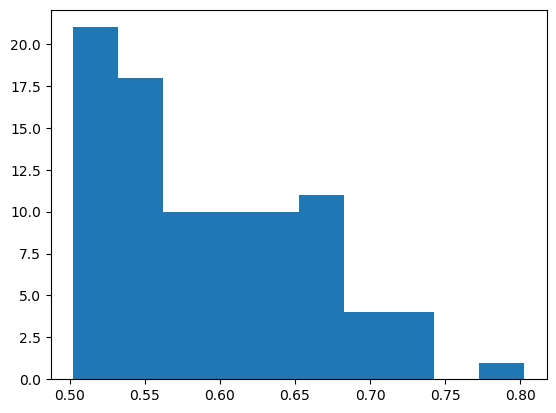

In [51]:
import matplotlib.pyplot as plt
errors_df = pd.DataFrame(errors, columns = ['Target', 'Prediction'])
e = errors_df[errors_df['Target'] == 0]

plt.hist(e['Prediction'])
plt.show()

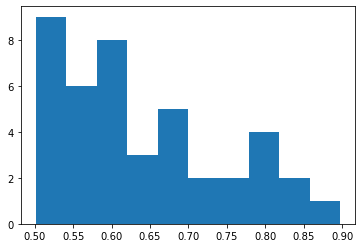

In [30]:
import matplotlib.pyplot as plt
errors_df = pd.DataFrame(errors, columns = ['Target', 'Prediction'])
e = errors_df[errors_df['Target'] == 0]

plt.hist(e['Prediction'])
plt.show()

Plot the distribution of predicted probability of melanoma for datapoints that were incorrectly listed as not melanoma but are actually melanoma (false negatives)

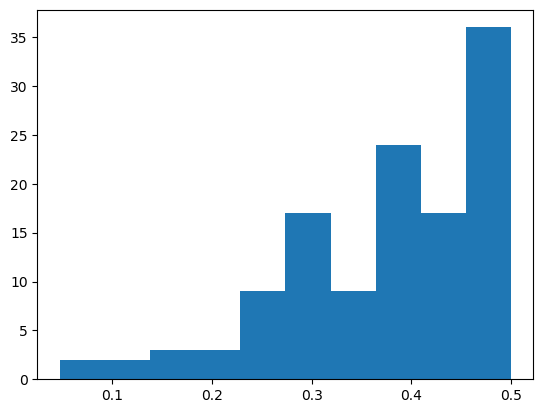

In [52]:
import matplotlib.pyplot as plt
errors_df = pd.DataFrame(errors, columns = ['Target', 'Prediction'])
e = errors_df[errors_df['Target'] == 1]

plt.hist(e['Prediction'])
plt.show()

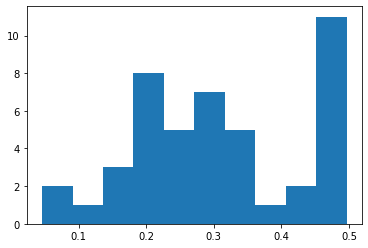

In [31]:
import matplotlib.pyplot as plt
errors_df = pd.DataFrame(errors, columns = ['Target', 'Prediction'])
e = errors_df[errors_df['Target'] == 1]

plt.hist(e['Prediction'])
plt.show()